In [1]:
import numpy as np
import xarray as xr
import pickle as pk
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib as mpl
mpl.rc('font',size=16,**{'family':'sans-serif','sans-serif':['Arial']})

In [2]:
#read in step response data
path = '/Volumes/eSSD0/Papers/JoC_gFBK/Data/'
door = ['open','closed']
pi = pk.load(open(path+'SI/b.e12.pi-control.T31_g37.ctl.2_ctl_diag.pk','rb'))

x4 = {}
py1 = {}
for i in range(2):

    x4[door[i]] = pk.load(open(path+'Outputs/b.e12.abrupt-4xCO2.T31_g37.ctl.'+door[i]+'.2_ctl_diag.pk','rb'))
    py1[door[i]] = pk.load(open(path+'Outputs/b.e12.1pyCO2.T31_g37.ctl.'+door[i]+'.2_ctl_diag.pk','rb'))


In [3]:
diagnostics = pk.load(open(path+'Outputs/b.e12.1pyCO2.T31_g37.ctl.closed.2_diag_grid.pk','rb'))

lat = diagnostics['lat']
lon = diagnostics['lon']

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat[None,:,None],(149,1,lon.size))

alb = np.average(np.nanmean(diagnostics['talb'],axis=1),weights=coslat, axis=(1,2))

In [4]:
incoming = py1['closed']['TSI']
outgoing = incoming*alb[:147]/100
outgoing_fixedalbedo = incoming*alb[0]/100
outgoing_delta = outgoing-outgoing_fixedalbedo
incoming_fixedalbedo = incoming-outgoing_delta

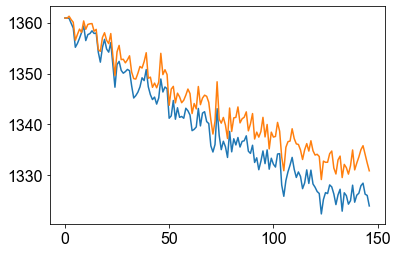

In [5]:
plt.plot(incoming)
plt.plot(incoming_fixedalbedo)

In [6]:
exps = ['4xCO2','1pyCO2']

dx4 = {}
dpy = {}
for door in x4.keys():

    dx4[door] = {}
    dpy[door] = {}

    for var in x4[door].keys():
        
        dx4[door][var] =  x4[door][var]-x4['open'][var][0]
        dpy[door][var] =  py1[door][var]-py1['open'][var][0]


dalb = alb-alb[0]

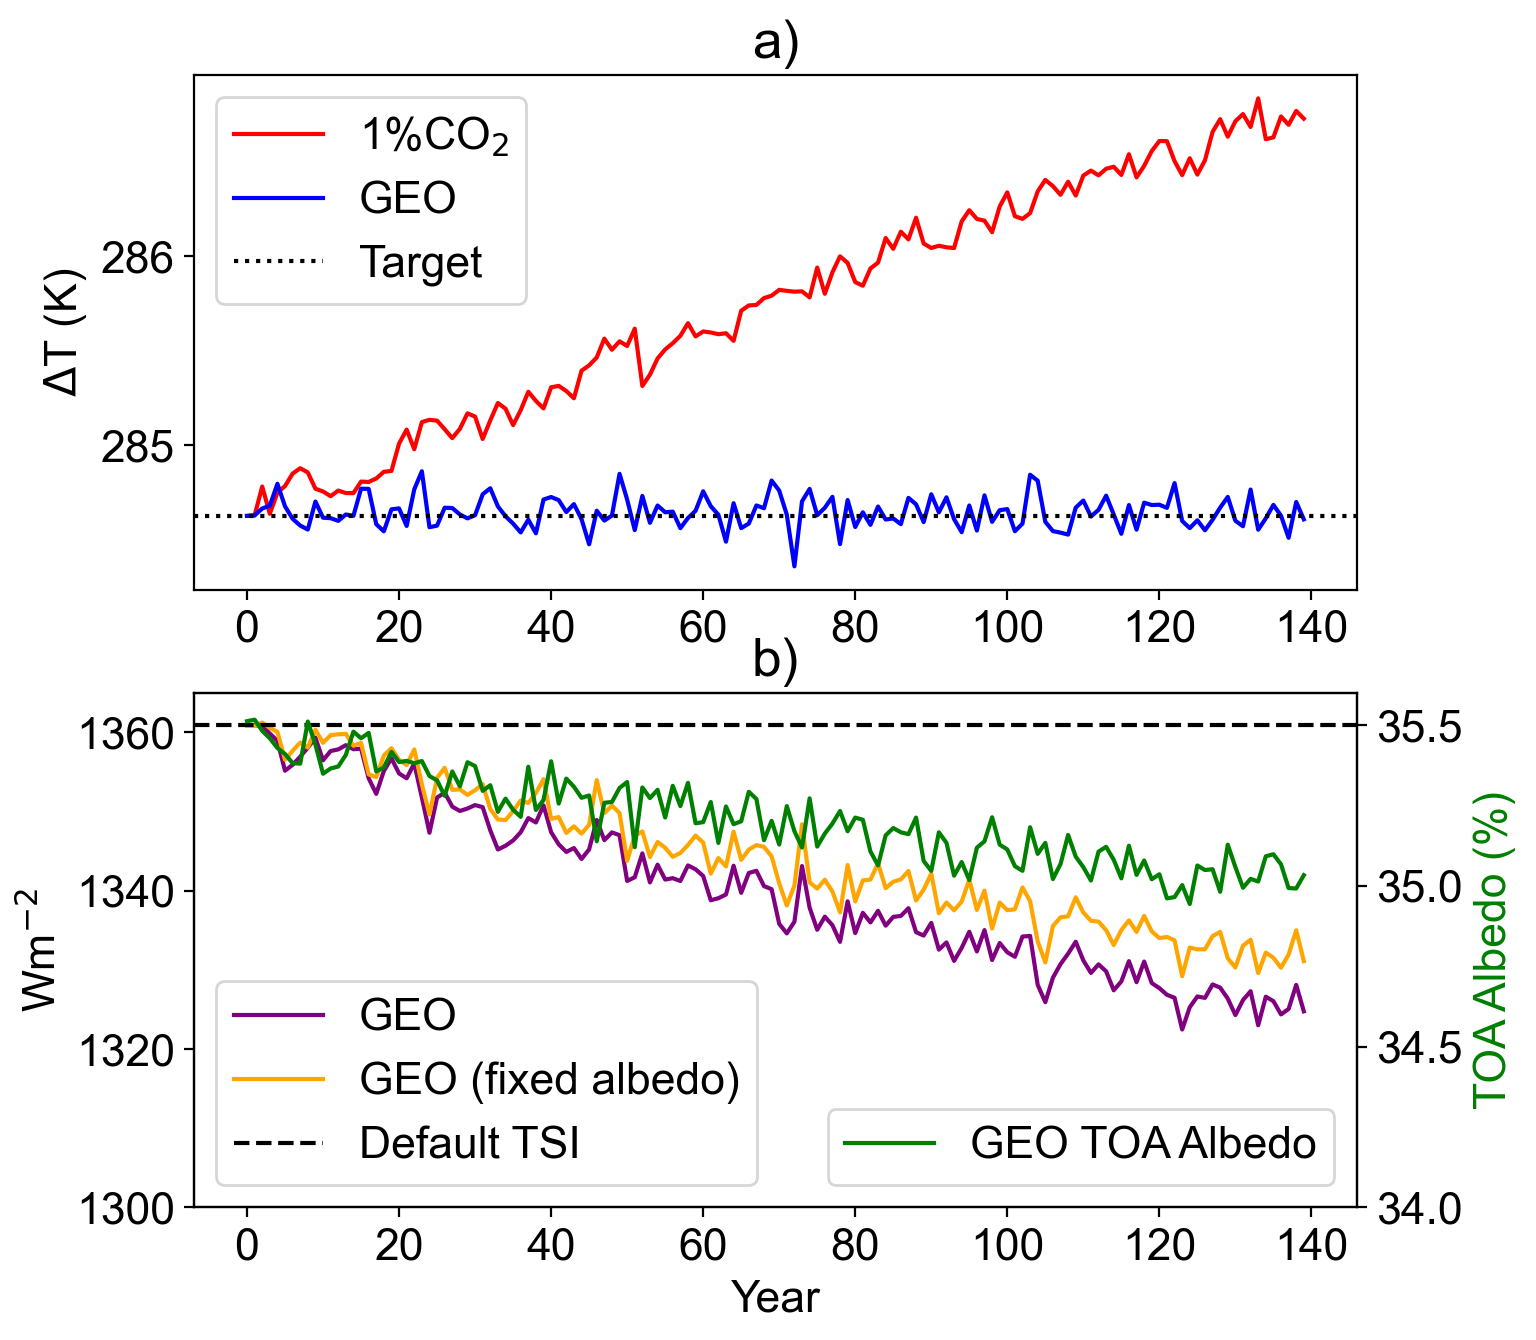

In [7]:
plt.figure(figsize=(7.5,7.5),dpi=200)

years = np.arange(0,140)

plt.subplot(211)
plt.title('a)')
plt.plot(years,py1['open']['tas'][:140],color='red', label='1%CO$_{2}$')
plt.plot(years,py1['closed']['tas'][:140],color='blue', label='GEO')
plt.axhline(py1['open']['tas'][0],color='k',linestyle=':', label = 'Target')
plt.legend()
plt.ylabel('$\Delta$T (K)')
#plt.ylim(-0.5,6)

ax1 = plt.subplot(212)
ax2 = ax1.twinx()
plt.title('b)')
ax1.plot(years,py1['closed']['TSI'][:140], color='purple',label='GEO')
ax1.plot(years,incoming_fixedalbedo[:140], color='orange',label='GEO (fixed albedo)')
ax2.plot(years,alb[:140],color='green', label='GEO TOA Albedo')
ax1.axhline(1360.89, color='k',linestyle='--',label='Default TSI')
ax1.legend()
ax2.legend(loc='lower right')
ax1.set_ylabel('Wm$^{-2}$')
ax2.set_ylabel('TOA Albedo (%)', color='green')
ax1.set_xlabel('Year')
ax1.set_ylim(1300,1365)
ax2.set_ylim(34,35.6)

plt.savefig('PIperf.png',bbox_inches='tight')


In [12]:
py1['closed']['TSI'][-1]

1324.0290000000002

In [11]:
incoming_fixedalbedo[-1]

1330.9210249007672

In [13]:
incoming_fixedalbedo[-1]-py1['closed']['TSI'][-1]

6.892024900766955